In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point
import researchpy as rp
import matplotlib.colors as mcolors

In [2]:
df1 = pd.read_csv('df1.csv')
df1.head(2)

,Gender,Age,AgeToday,MaritalStatus,EducationalStatus,Religion,Occupation,OccupationGroup,Tribe,LGAofOrigin,StateofOrigin,State,State1,Date,Diagnosis
0,MALE,65,87,Married,No Schooling,Islam,DRIVER,Elementary Occupation,Shuwa,NaN,Borno,Borno,Borno,17/12/1999,VASCULAR DEMENTIA
1,MALE,85,106,Married,No Schooling,Islam,FARMER,Unemployed,Kanuri,NaN,Borno,Borno,Borno,25/08/2000,DEMENTIA


In [298]:
# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')

# Extract the year from the 'Date' column
df1['Year'] = df1['Date'].dt.strftime('%Y')

# Display the first two rows of the 'Year' column
print(df1['Year'].head(2))

0    1999
1    2000
Name: Year, dtype: object


In [299]:
df2 = df1['Year'].value_counts().reset_index().rename(columns={'index': 'Year', 'Year': 'Year'})
df2.head(2)

,Year,count
0,2020,102
1,2022,89


<Figure size 640x480 with 0 Axes>

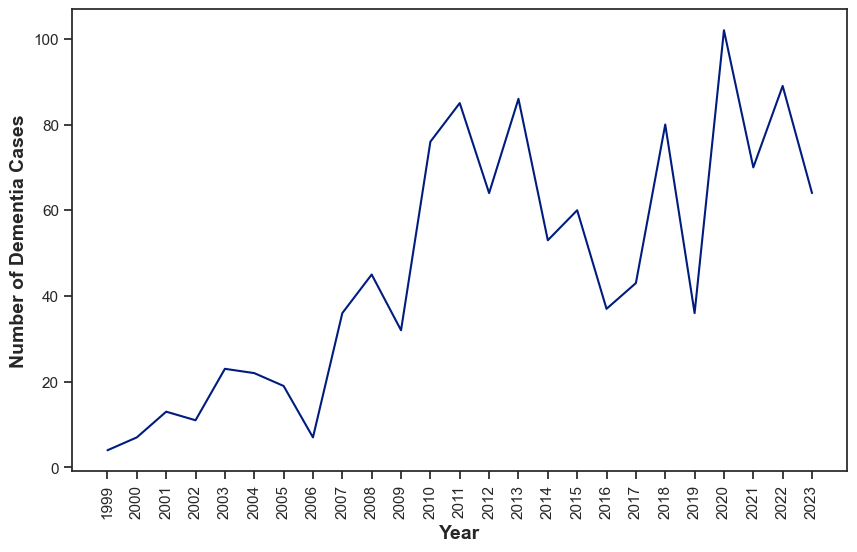

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where the Year is 2024
df2 = df2[df2['Year'] != "2024"]

# Sort the DataFrame by 'Year' to ensure the plot starts with the oldest year
df2_sorted = df2.sort_values(by='Year')

# Create the figure and axis objects
plt.figure(figsize=(10, 6))

# Plot the trend line
sns.lineplot(x='Year', y='count', data=df2_sorted, marker='', color='b')

# Add 
plt.xlabel('Year', fontsize=14, weight="bold")
plt.ylabel('Number of Dementia Cases', fontsize=14, weight="bold")

# Rotate x-tick labels 90 degrees
plt.xticks(rotation=90)

# Remove gridlines by not adding them
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig('Trend.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_91597/3202743195.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='count', data=df2_sorted,


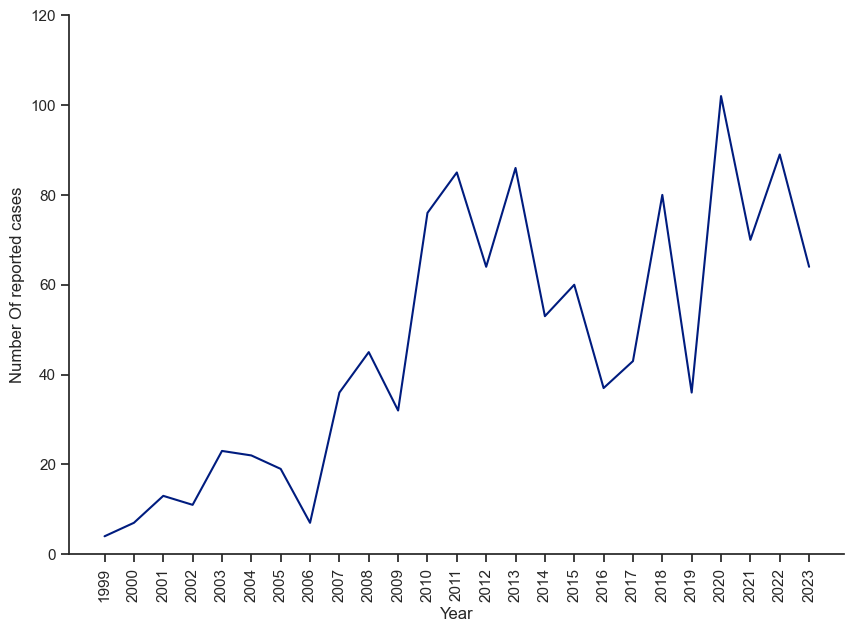

In [300]:
sns.lineplot(x='Year', y='count', data=df2_sorted,
palette="dark",markers=True,dashes=False)
sns.despine(offset=0, trim=False)
plt.xticks(rotation=90)
plt.ylabel('Number Of reported cases')
plt.ylim(0,120)
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.savefig('Figure 1.svg', bbox_inches = 'tight', dpi=300)

In [101]:
df1 = df1[df1['Year'] != "2024"]
df1['Gender'] = df1['Gender'].str.title()
Count1 = pd.crosstab(index=df1['Gender'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Gender,,
Female,509,43.728522
Male,655,56.271478


In [278]:
df4['Age'].describe()

count    423.000000
mean      71.886525
std        8.336602
min       60.000000
25%       65.000000
50%       70.000000
75%       78.000000
max      101.000000
Name: Age, dtype: float64

In [277]:

df4['Gender'] = df4['Gender'].str.title()
Count1 = pd.crosstab(index=df4['Gender'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Gender,,
Female,189,44.680851
Male,234,55.319149


In [275]:
# Calculate the mean age by gender
mean_age_by_gender = df4.groupby('Gender')['Age'].mean()

# Display the result
print(mean_age_by_gender)


Gender
Female    72.169312
Male      71.658120
Name: Age, dtype: float64


In [6]:
import numpy as np

# Calculate the SEM for males
sem_male = np.std(male_age, ddof=1) / np.sqrt(len(male_age))

# Calculate the SEM for females
sem_female = np.std(female_age, ddof=1) / np.sqrt(len(female_age))

print(f"SEM for Males: {sem_male:.4f}")
print(f"SEM for Females: {sem_female:.4f}")


SEM for Males: 0.8217
SEM for Females: 0.7880


In [7]:
import numpy as np

# Calculate the standard deviation for males
std_male = np.std(male_age, ddof=1)

# Calculate the standard deviation for females
std_female = np.std(female_age, ddof=1)

print(f"Standard Deviation for Males: {std_male:.4f}")
print(f"Standard Deviation for Females: {std_female:.4f}")

Standard Deviation for Males: 9.7227
Standard Deviation for Females: 8.3764


In [274]:
# Calculate the mean age by gender
mean_age_by_gender = df1.groupby('Gender')['Age'].mean()

# Display the result
print(mean_age_by_gender)

Gender
Female    72.667293
Male      71.420205
Name: Age, dtype: float64


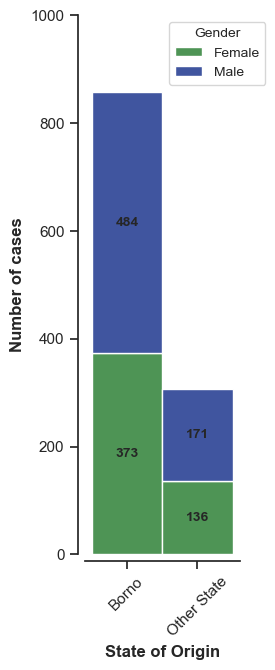

In [301]:
df1 = df1[df1['Year'] != "2024"]
df1['Gender'] = df1['Gender'].str.title()
df1['Gender'] = pd.Categorical(df1["Gender"], ["Male", "Female"])
df1 = df1.sort_values('State1')
plt.figure(figsize=(10, 4))
sns.set_theme(style="ticks", palette="dark")
plot = sns.histplot(x="State1", hue="Gender",multiple="stack",palette=["b", "g"],data=df1)

# Manually create the legend
plt.legend(title='Gender', labels=['Female', 'Male'], bbox_to_anchor=(0.5, 1), loc='upper left', fontsize=10, title_fontsize='10')

# Annotate the bars with values
for container in plot.containers:
    plot.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, weight='bold')
sns.despine(offset=5, trim=False)
plt.ylim(0,1000)
plt.xticks(rotation=45)
plt.ylabel('Number of cases', weight="bold", fontsize=12)
plt.xlabel('State of Origin', weight="bold", fontsize=12)

legend = plt.gca().get_legend()
legend.set_title('Gender')

fig = plt.gcf()
fig.set_size_inches(2, 7)
plt.savefig('Figure_1B.svg', bbox_inches='tight', dpi=300)

In [47]:
df1 = df1[df1['Year'] != "2024"]
df1['State'] = df1['State'].str.title()
Count1 = pd.crosstab(index=df1['State'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
State,,
Adamawa,49,4.206009
Bauchi,20,1.716738
Borno,857,73.562232
Gombe,7,0.600858
Jigawa,19,1.630901
Kano,22,1.888412
Kartsina,6,0.515021
Other,30,2.575107
Sokoto,12,1.030043


/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_91597/3351500526.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, Borno.geometry.centroid.y, merged_data['NAME_2']):


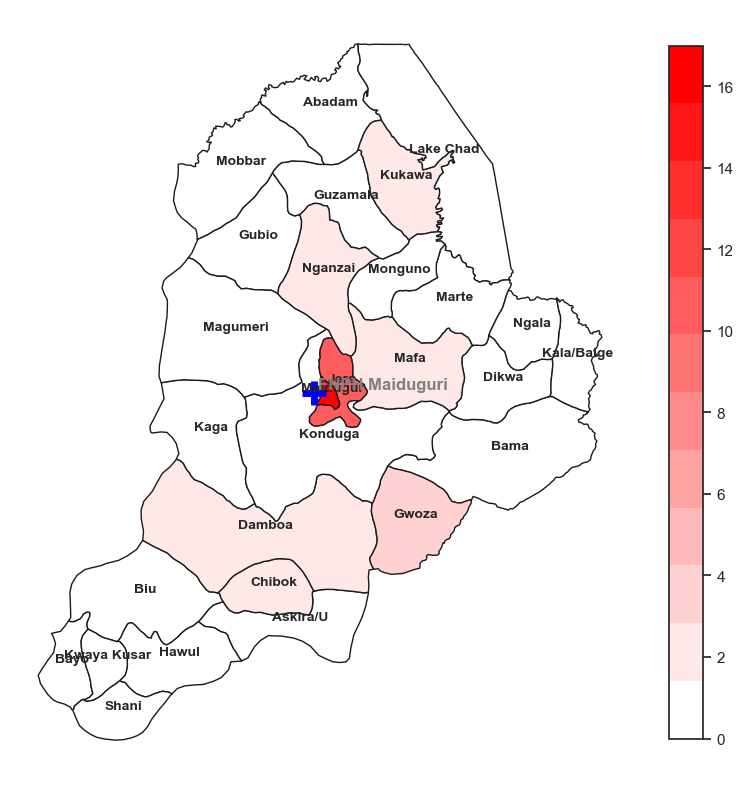

In [303]:
nigeria = gpd.read_file('nigeria_lga.geojson')
Borno = (nigeria[nigeria['NAME_1'] ==  'Borno'])
df5 = pd.read_csv('df5.csv')
df5['lga res'] = df5['lga res'].str.title()
df6 = (df5[df5['state of Res'] ==  'Borno State'])
df7 = df6['lga res'].value_counts().reset_index().rename(columns={'index': 'lga res', 'lga res': 'lga res'})
#uploading population data
LGA_Pop = pd.read_csv('EST_POP_Borno.csv')
#Merging Population data with number of cases
df7_merged = pd.merge(df7, LGA_Pop, on='lga res', how='left')
#Calculating the prevalence in 10000 individuals
df7_merged['Prevalence'] = round((df7_merged['count'] / df7_merged['EST_POP']) * 100000)
#Mergeing map data with number of cases and population data
merged_data = pd.merge(Borno, df7_merged[['NAME_2', 'Prevalence']], left_on='NAME_2', right_on='NAME_2', how='left')
merged_data['Prevalence'] = merged_data['Prevalence'].fillna(0).astype(int)
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load your Yobe GeoDataFrame
# Replace 'path_to_your_shapefile.shp' with the actual path to your Yobe shapefile 11.865111946726902, 13.118647010767711.

# Define the pin locations
locations = [
    {'name': 'FNPH Maiduguri', 'lat': 11.865111946726902, 'lon': 13.118647010767711}
]

vmin = 0
vmax = 11

# Create a web map with the Stamen Terrain tile provider and projection
ax = merged_data.plot(column='Prevalence', cmap=mcolors.LinearSegmentedColormap.from_list('CustomColormap', ['w', 'red'], N=vmax-vmin+1), edgecolor='k', figsize=(10, 8),legend=True, legend_kwds={'shrink': 0.9})

# Add labels for each local government area
for x, y, label in zip(merged_data.geometry.centroid.x, Borno.geometry.centroid.y, merged_data['NAME_2']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, weight='bold', ha='center')

# Add pins and labels for the GPS locations
for location in locations:
    lat, lon = location['lat'], location['lon']
    name = location['name']
    ax.scatter(lon, lat, color='blue', marker='+', lw=5,s=300, label=name)  # Modify marker style, size, and color as needed
    ax.annotate(name, xy=(lon, lat), xytext=(3, 3), textcoords="offset points", fontsize=12, weight='bold', color='grey')

# Adjust plot settings
fig = plt.gcf()
ax.set_axis_off()
fig.set_size_inches(10, 10)
plt.savefig('Figure_1C.svg', bbox_inches='tight', dpi=300)
plt.show()

In [280]:
import numpy as np
import scipy.stats as stats

# Calculate the actual prevalence
df7_merged['Prevalence'] = df7_merged['count'] / df7_merged['EST_POP']
df7_merged['Prevalence10'] = df7_merged['count'] / df7_merged['EST_POP']*100000
# Calculate the standard error
df7_merged['Standard_Error'] = np.sqrt((df7_merged['Prevalence'] * (1 - df7_merged['Prevalence'])) / df7_merged['EST_POP'])

# Calculate the 95% confidence interval
z_score = stats.norm.ppf(0.975)  # 95% confidence level
df7_merged['CI_Lower'] = df7_merged['Prevalence'] - z_score * df7_merged['Standard_Error']
df7_merged['CI_Upper'] = df7_merged['Prevalence'] + z_score * df7_merged['Standard_Error']

# Display the results
df7_merged

,lga res,count,NAME_2,Local Government,EST_POP,Prevalence,Standard_Error,CI_Lower,CI_Upper,Prevalence10
0,Maiduguri,226,Maidugur,Maiduguri,1293334,0.000175,1.162266e-05,1.519622e-04,0.000198,17.474218
1,Jere,38,Jere,Jere,394324,0.000096,1.563211e-05,6.572908e-05,0.000127,9.636745
2,Mafa,8,Mafa,Mafa,362244,0.000022,7.807985e-06,6.781191e-06,0.000037,2.208456
3,Kukawa,6,Kukawa,Kukawa,261579,0.000023,9.364137e-06,4.584249e-06,0.000041,2.293762
4,Gwoza,6,Gwoza,Gwoza,229998,0.000026,1.064991e-05,5.213745e-06,0.000047,2.608718
5,Biu,6,Biu,Biu,438030,0.000014,5.592021e-06,2.737532e-06,0.000025,1.369769
6,Damboa,6,Damboa,Damboa,293434,0.000020,8.347583e-06,4.086566e-06,0.000037,2.044753
7,Bama,5,Bama,Bama,391566,0.000013,5.710541e-06,1.576785e-06,0.000024,1.276924
8,Dikwa,5,Dikwa,Dikwa,352895,0.000014,6.336310e-06,1.749581e-06,0.000027,1.416852
9,Chibok,5,Chibok,Chibok,252147,0.000020,8.868025e-06,2.448694e-06,0.000037,1.982970


In [3]:
df4 = pd.read_csv('raw_data.csv')

df4.head(2)

,start,end,today,username,File Number,Age,Gender,Nationality,Specify Other Country,Country of Residence,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2024-08-10,2024-08-10,2024-08-10,zainabyaganami,98906,100,Male,Nigerian,NaN,Nigeria,...,369301611,13f7c853-3079-43f9-bb87-ef4fe3d71a2e,2024-08-09,NaN,NaN,submitted_via_web,teemerhkadau,vgCwCqB2dnKTsLdFyQWStE,NaN,67
1,2024-08-13,2024-08-13,2024-08-13,sunkani,93104,80,Female,Nigerian,NaN,Nigeria,...,369303293,b1315c46-b1f6-4b8b-ae82-9425d0905e90,2024-08-09,NaN,NaN,submitted_via_web,nasyrms,vgCwCqB2dnKTsLdFyQWStE,NaN,68


In [305]:
# Convert 'Date' column to datetime format
df4['Date of First Visit'] = pd.to_datetime(df4['Date of First Visit'], format='%d/%m/%Y')

# Extract the year from the 'Date' column
df4['Year'] = df4['Date of First Visit'].dt.strftime('%Y')
df4 = df4[df4['Year'] != "2024"]

# Display the first two rows of the 'Year' column
df4.head(2)

,start,end,today,username,File Number,Age,Gender,Nationality,Specify Other Country,Country of Residence,...,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index,Year
0,2024-08-10,2024-08-10,2024-08-10,zainabyaganami,98906,100,Male,Nigerian,NaN,Nigeria,...,13f7c853-3079-43f9-bb87-ef4fe3d71a2e,2024-08-09,NaN,NaN,submitted_via_web,teemerhkadau,vgCwCqB2dnKTsLdFyQWStE,NaN,67,2023
1,2024-08-13,2024-08-13,2024-08-13,sunkani,93104,80,Female,Nigerian,NaN,Nigeria,...,b1315c46-b1f6-4b8b-ae82-9425d0905e90,2024-08-09,NaN,NaN,submitted_via_web,nasyrms,vgCwCqB2dnKTsLdFyQWStE,NaN,68,2023


In [5]:
import pandas as pd
import scipy.stats as stats

# Separate the data by gender
male_age = df1[df1['Gender'] == 'Male']['Age']
female_age = df1[df1['Gender'] == 'Female']['Age']

# Shapiro-Wilk test for normality
shapiro_male = stats.shapiro(male_age)
shapiro_female = stats.shapiro(female_age)

print("Shapiro-Wilk Test:")
print(f"Male: W={shapiro_male[0]:.4f}, p-value={shapiro_male[1]:.4f}")
print(f"Female: W={shapiro_female[0]:.4f}, p-value={shapiro_female[1]:.4f}")

# T-test if both groups are normally distributed
if shapiro_male[1] > 0.05 and shapiro_female[1] > 0.05:
    t_test = stats.ttest_ind(male_age, female_age)
    print("\nT-Test:")
    print(f"t-statistic={t_test.statistic:.4f}, p-value={t_test.pvalue:.4f}")
else:
    print("\nT-Test cannot be performed since the data is not normally distributed.")

# Mann-Whitney U test (non-parametric)
mannwhitneyu_test = stats.mannwhitneyu(male_age, female_age)
print("\nMann-Whitney U Test:")
print(f"U-statistic={mannwhitneyu_test.statistic:.4f}, p-value={mannwhitneyu_test.pvalue:.4f}")


Shapiro-Wilk Test:
Male: W=0.9237, p-value=0.0000
Female: W=0.9487, p-value=0.0003

T-Test cannot be performed since the data is not normally distributed.

Mann-Whitney U Test:
U-statistic=7420.0000, p-value=0.3941


In [306]:
df4['Age'].describe()

count    423.000000
mean      71.886525
std        8.336602
min       60.000000
25%       65.000000
50%       70.000000
75%       78.000000
max      101.000000
Name: Age, dtype: float64

In [272]:
df1['Age'].describe()

count    1216.000000
mean       71.971217
std        20.192611
min        60.000000
25%        65.000000
50%        70.000000
75%        76.000000
max       710.000000
Name: Age, dtype: float64

In [114]:
Count1 = pd.crosstab(index=df4['Dementia Type1'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Dementia Type1,,
Alzheimer's disease,256,60.520095
Dementia due to Head trauma,1,0.236407
Depressive pseudo dementia,1,0.236407
Fronto Temporal,2,0.472813
Lewy Body,1,0.236407
Mixed,19,4.491726
Other,4,0.945626
Psuedodepressive Dementia,1,0.236407
Unclassified,35,8.274232


In [244]:
Count1 = pd.crosstab(index=df4['Dementia Type'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Dementia Type,,
Alzheimer's disease,256,60.520095
Mixed,19,4.491726
Other,8,1.891253
Unclassified,36,8.510638
Vascular,104,24.586288


/var/folders/3c/x_98sf2n3pzcx2kl3ykfl_m40000gn/T/ipykernel_91597/1427071107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["Alzheimer's\n disease","Vascular", "Unclassified","Mixed","Other"])


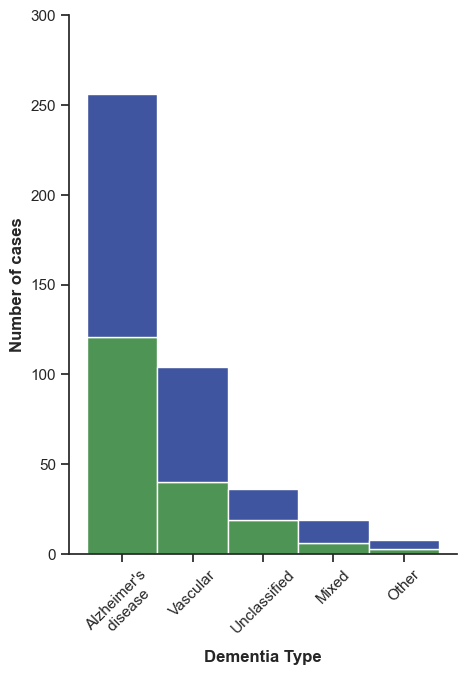

In [307]:
df4 = df4[df4['Year'] != "2024"]
df4['Dementia Type'] = pd.Categorical(df4["Dementia Type"], ["Alzheimer's disease", "Vascular","Unclassified", "Mixed","Other"])
plt.figure(figsize=(10, 4))
sns.set_theme(style="ticks", palette="dark")
plot = sns.histplot(x="Dementia Type", hue="Gender",multiple="stack",palette=["b", "g"],data=df4,legend=False)

sns.despine(offset=0, trim=False)
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.ylabel('Number of cases', weight="bold", fontsize=12)
plt.xlabel('Dementia Type', weight="bold", fontsize=12)

plt.gca().set_xticklabels(["Alzheimer's\n disease","Vascular", "Unclassified","Mixed","Other"])
fig = plt.gcf()
fig.set_size_inches(5, 7)
plt.savefig('Figure_1D.svg', bbox_inches='tight', dpi=300)

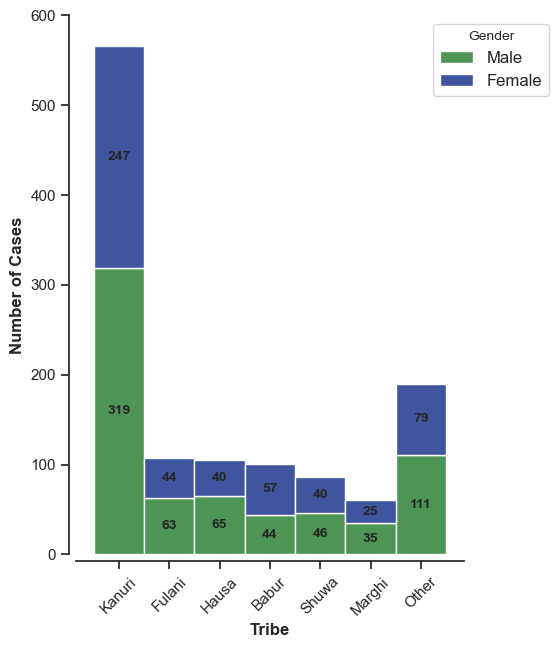

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('df1.csv')
# Convert strings to title case and sort values
df1['Gender'] = df1['Gender'].str.title()
df1 = df1.sort_values('Tribe')
df1['Tribe'] = pd.Categorical(df1["Tribe"], ["Kanuri","Fulani","Hausa","Babur","Shuwa","Marghi","Other"])
# Set the theme for the plot
sns.set_theme(style="ticks", palette="dark")

# Create the histogram plot with explicit labels
plot = sns.histplot(x="Tribe", data=df1, hue='Gender', multiple="stack", palette=["b", "g"], discrete=True, legend=False)

# Manually create the legend
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(0.9, 1), loc='upper left', fontsize=12, title_fontsize='10')

# Annotate the bars with values
for container in plot.containers:
    plot.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, weight='bold')

# Remove spines and set limits
sns.despine(offset=5, trim=False)

# Rotate x-tick labels and set labels
plt.xticks(rotation=45)
plt.ylabel('Number of Cases', weight="bold", fontsize=12)
plt.xlabel('Tribe', weight="bold", fontsize=12)
plt.ylim(0,600)

# Adjust the size of the figure
fig = plt.gcf()
fig.set_size_inches(5, 7)
#plt.gca().set_xticklabels(["Alzheimer's\n disease","Vascular","Others"])
# Save the plot
plt.savefig('Figure_1F.svg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [282]:
Count1 = pd.crosstab(index=df1['Tribe'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Tribe,,
Kanuri,566,46.546053
Fulani,107,8.799342
Hausa,105,8.634868
Babur,101,8.305921
Shuwa,86,7.072368
Marghi,60,4.934211
Other,191,15.707237


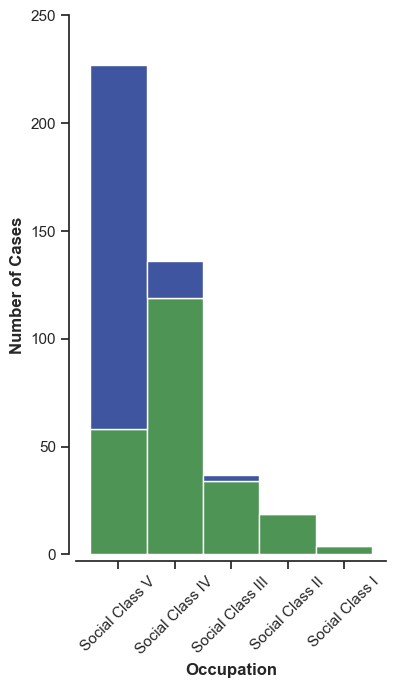

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert strings to title case and sort values
df4['Gender'] = df4['Gender'].str.title()
df4 = df4.sort_values('Occupation',ascending=False)

# Set the theme for the plot
sns.set_theme(style="ticks", palette="dark")

# Create the histogram plot with explicit labels
plot = sns.histplot(x="Occupation", data=df4, hue='Gender', multiple="stack", palette=["b", "g"], discrete=True, legend=False)


# Remove spines and set limits
sns.despine(offset=5, trim=False)

# Rotate x-tick labels and set labels
plt.xticks(rotation=45)
plt.ylabel('Number of Cases', weight="bold", fontsize=12)
plt.xlabel('Occupation', weight="bold", fontsize=12)
plt.ylim(0,250)

# Adjust the size of the figure
fig = plt.gcf()
fig.set_size_inches(4, 7)
#plt.gca().set_xticklabels(["Alzheimer's\n disease","Vascular","Others"])
# Save the plot
plt.savefig('Figure_1E.svg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [120]:
Count1 = pd.crosstab(index=df4['Occupation'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Occupation,,
Social Class I,4,0.945626
Social Class II,19,4.491726
Social Class III,37,8.747045
Social Class IV,136,32.151300
Social Class V,227,53.664303


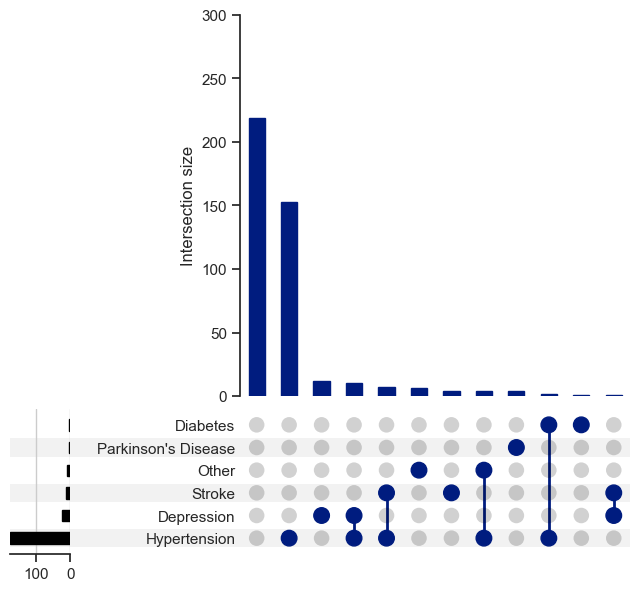

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df4 = pd.read_csv('raw_data.csv')

# List of symptom columns
#Parkinson's Disease	Hypertension	Stroke	Diabetes	Depression	None	Other
Comobities = ["Parkinson's Disease","Hypertension","Stroke","Diabetes","Depression","Other"]


df4[Comobities] = df4[Comobities] == 1

# Create UpSet plot data
upset_data = df4.set_index(Comobities)
upset_data = upset_data.groupby(Comobities).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot

plt.ylim(0,300)
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.grid(False)
plt.savefig('Figure_2A.svg', bbox_inches='tight', dpi=300)
plt.show()

In [135]:
import pandas as pd

# List of comorbidity columns
Comobities = ["Parkinson's Disease", "Hypertension", "Stroke", "Diabetes", "Depression", "Other"]

# Convert comorbidity columns to boolean (1 for True, 0 for False)
df4[Comobities] = df4[Comobities] == 1

# Create UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(Comobities).groupby(Comobities).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[Comobities].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual comorbidity columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
print(combinations_df)

                 Combination  Occurrences
0                                     219
1                      Other            6
2                 Depression           12
3                   Diabetes            1
4                     Stroke            4
5         Stroke, Depression            1
6               Hypertension          153
7        Hypertension, Other            4
8   Hypertension, Depression           10
9     Hypertension, Diabetes            2
10      Hypertension, Stroke            7
11       Parkinson's Disease            4


In [136]:
import pandas as pd

# List of comorbidity columns
Comobities = ["Parkinson's Disease", "Hypertension", "Stroke", "Diabetes", "Depression", "Other"]

# Convert comorbidity columns to boolean (1 for True, 0 for False)
df4[Comobities] = df4[Comobities] == 1

# Calculate the total occurrences for each comorbidity
comorbidity_totals = df4[Comobities].sum().reset_index()

# Rename columns for clarity
comorbidity_totals.columns = ['Comorbidity', 'Total Occurrences']

# Display the result
print(comorbidity_totals)


           Comorbidity  Total Occurrences
0  Parkinson's Disease                  4
1         Hypertension                176
2               Stroke                 12
3             Diabetes                  3
4           Depression                 23
5                Other                 10


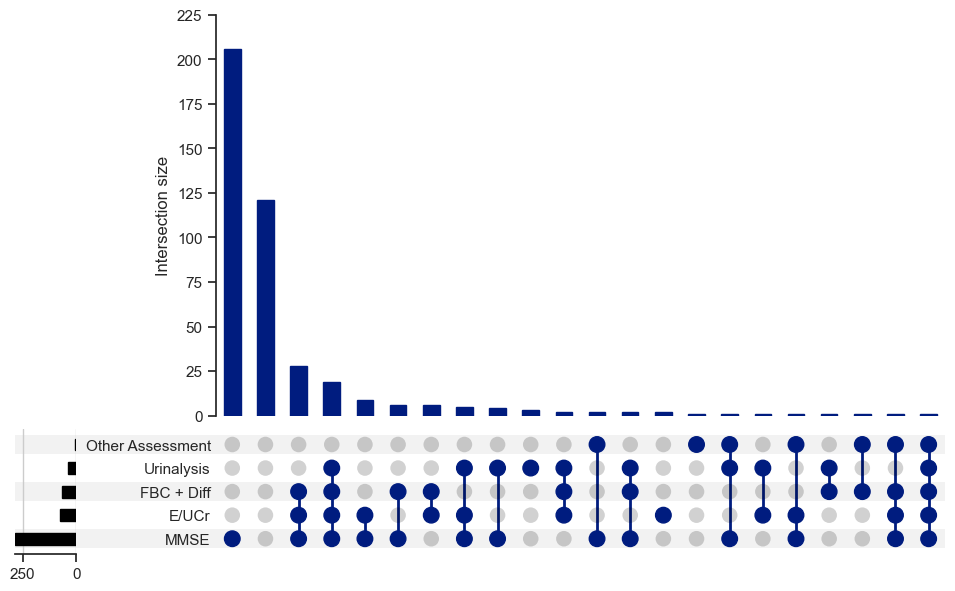

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df4 = pd.read_csv('raw_data.csv')

# List of symptom columns
Investigation = ["MMSE","E/UCr","FBC + Diff","Urinalysis","Other Assessment"]

# Convert symptoms to boolean
df4[Investigation] = df4[Investigation] == "Yes"

# Create UpSet plot data
upset_data = df4.set_index(Investigation)
upset_data = upset_data.groupby(Investigation).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot
plt.suptitle('')
plt.ylim(0,225)
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.savefig('Figure_3B.svg', bbox_inches='tight', dpi=300)
plt.show()

In [154]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Investigation = ["MMSE", "E/UCr", "FBC + Diff", "Urinalysis", "Other Assessment"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Investigation] = df4[Investigation] == "Yes"

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(Investigation).groupby(Investigation).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[Investigation].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,,121
1,Other Assessment,1
2,Urinalysis,3
3,"FBC + Diff, Other Assessment",1
4,"FBC + Diff, Urinalysis",1
5,E/UCr,2
6,"E/UCr, Urinalysis",1
7,"E/UCr, FBC + Diff",6
8,"E/UCr, FBC + Diff, Urinalysis",2
9,MMSE,206


In [150]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Investigation = ["MMSE", "E/UCr", "FBC + Diff", "Urinalysis", "Other Assessment"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Investigation] = df4[Investigation] == "Yes"

# Calculate the total occurrences for each investigation
investigation_totals = df4[Investigation].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Investigation', 'Total Occurrences']

# Display the result
print(investigation_totals)

      Investigation  Total Occurrences
0              MMSE                285
1             E/UCr                 75
2        FBC + Diff                 67
3        Urinalysis                 39
4  Other Assessment                  8


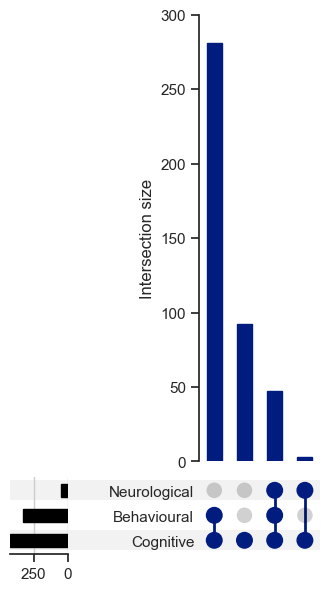

In [314]:


df4 = pd.read_csv('raw_data.csv')
df5.head()

# List of symptom columns
Symptoms = ["Behavioural","Cognitive","Neurological"]

# Convert Predisposig Factors to boolean
df4[Symptoms] = df4[Symptoms] == 1

# Create UpSet plot data
upset_data = df4.set_index(Symptoms)
upset_data = upset_data.groupby(Symptoms).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot
plt.suptitle('')
plt.ylim(0,300)
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(4, 7)
plt.savefig('Figure_3A.svg', bbox_inches='tight', dpi=300)
plt.show()

In [157]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Behavioural","Cognitive","Neurological"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(Symptoms).groupby(Symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[Symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,Cognitive,92
1,"Cognitive, Neurological",3
2,"Behavioural, Cognitive",281
3,"Behavioural, Cognitive, Neurological",47


In [159]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Behavioural","Cognitive","Neurological"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
print(Symptoms_totals)

          index    0
0   Behavioural  328
1     Cognitive  423
2  Neurological   50


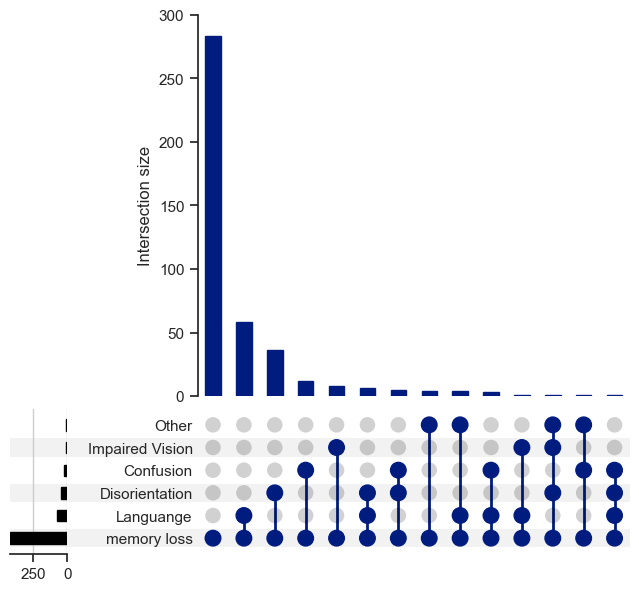

In [315]:

df4 = pd.read_csv('raw_data.csv')
df4.head()

# List of symptom columns
symptoms = ["memory loss","Confusion","Disorientation","Languange","Impaired Vision","Other"]

df4[symptoms] = df4[symptoms] == 1

# Create UpSet plot data
upset_data = df4.set_index(symptoms)
upset_data = upset_data.groupby(symptoms).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot
plt.suptitle('')
plt.ylim(0,300)
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.savefig('Figure_3C.svg', bbox_inches='tight', dpi=300)
plt.show()


In [170]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["memory loss","Confusion","Disorientation","Languange","Impaired Vision","Other"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,memory loss,283
1,"memory loss, Other",4
2,"memory loss, Impaired Vision",8
3,"memory loss, Languange",58
4,"memory loss, Languange, Other",4
5,"memory loss, Languange, Impaired Vision",1
6,"memory loss, Disorientation",36
7,"memory loss, Disorientation, Impaired Vision, ...",1
8,"memory loss, Disorientation, Languange",6
9,"memory loss, Confusion",12


In [172]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["memory loss","Confusion","Disorientation","Languange","Impaired Vision","Other"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,memory loss,423
1,Confusion,22
2,Disorientation,49
3,Languange,73
4,Impaired Vision,10
5,Other,10


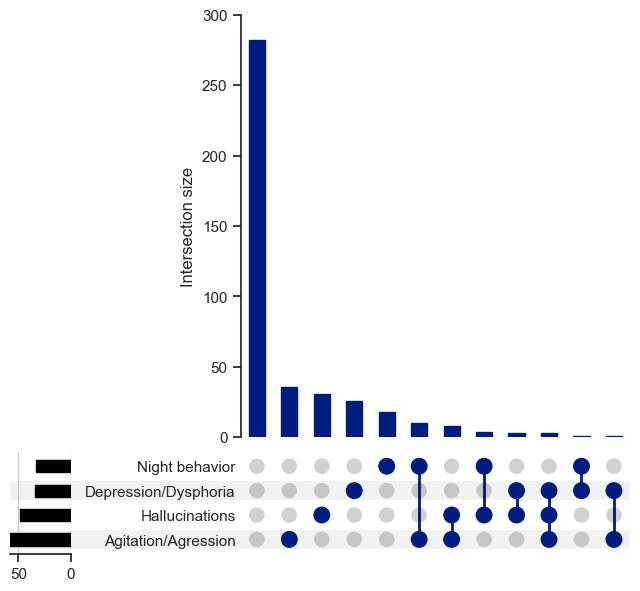

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df4 = pd.read_csv('raw_data.csv')

# List of symptom columns
Behavioural = ["Agitation/Agression","Depression/Dysphoria","Hallucinations","Night behavior"]

# Convert symptoms to boolean
df4[Behavioural] = df4[Behavioural] == 1

# Create UpSet plot data
upset_data = df4.set_index(Behavioural)
upset_data = upset_data.groupby(Behavioural).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot

plt.ylim(0,300)
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(8, 7)
#Symptoms12,Behavioural_
plt.savefig('Figure_3D.png', bbox_inches='tight', dpi=300)
plt.show()

In [178]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["Agitation/Agression","Depression/Dysphoria","Hallucinations","Night behavior"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,,282
1,Night behavior,18
2,Hallucinations,31
3,"Hallucinations, Night behavior",4
4,Depression/Dysphoria,26
5,"Depression/Dysphoria, Night behavior",1
6,"Depression/Dysphoria, Hallucinations",3
7,Agitation/Agression,36
8,"Agitation/Agression, Night behavior",10
9,"Agitation/Agression, Hallucinations",8


In [179]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Agitation/Agression","Depression/Dysphoria","Hallucinations","Night behavior"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Agitation/Agression,58
1,Depression/Dysphoria,34
2,Hallucinations,49
3,Night behavior,33


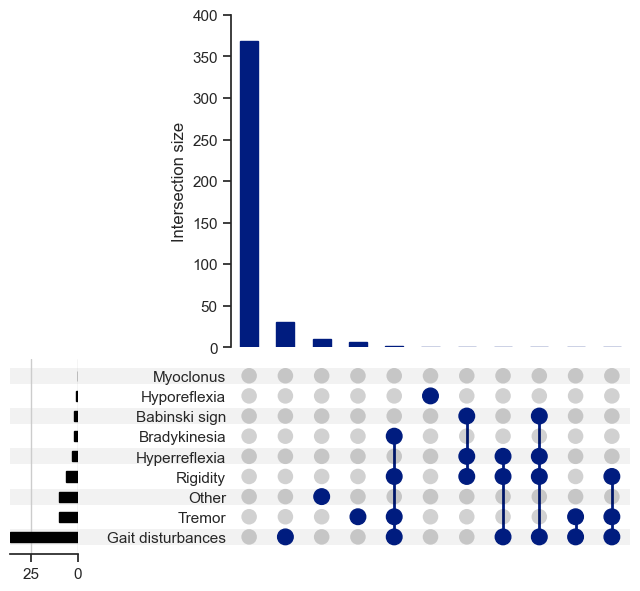

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df4 = pd.read_csv('raw_data.csv')

# List of symptom columns
Neurological = ["Gait disturbances","Tremor","Rigidity","Bradykinesia","Myoclonus","Hyperreflexia","Hyporeflexia","Babinski sign","Other"]

# Convert symptoms to boolean
df4[Neurological] = df4[Neurological] == 1

# Create UpSet plot data
upset_data = df4.set_index(Neurological)
upset_data = upset_data.groupby(Neurological).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot
plt.ylim(0,400)
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.grid(False)
#Symptoms12,Behavioural_Neurological_
plt.savefig('Figure_3E.svg', bbox_inches='tight', dpi=300)
plt.show()

In [183]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["Gait disturbances","Tremor","Rigidity","Bradykinesia","Myoclonus","Hyperreflexia","Hyporeflexia","Babinski sign","Other"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,,369
1,Other,10
2,Hyporeflexia,1
3,"Rigidity, Hyperreflexia, Babinski sign",1
4,Tremor,6
5,Gait disturbances,30
6,"Gait disturbances, Rigidity, Hyperreflexia",1
7,"Gait disturbances, Rigidity, Hyperreflexia, Ba...",1
8,"Gait disturbances, Tremor",1
9,"Gait disturbances, Tremor, Rigidity",1


In [188]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Gait disturbances","Tremor","Rigidity","Bradykinesia","Myoclonus","Hyperreflexia","Hyporeflexia","Babinski sign","Other"]


# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Gait disturbances,36
1,Tremor,10
2,Rigidity,6
3,Bradykinesia,2
4,Myoclonus,0
5,Hyperreflexia,3
6,Hyporeflexia,1
7,Babinski sign,2
8,Other,10


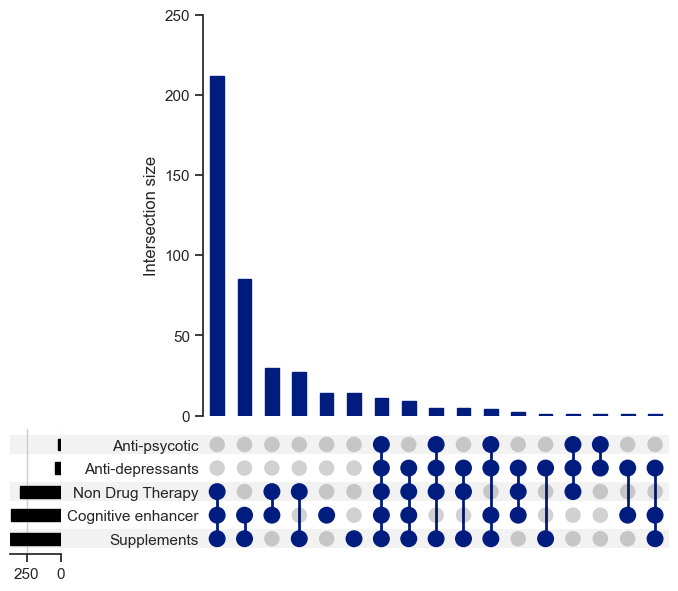

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df5 = pd.read_csv('raw_data.csv')
df5.head()

# List of symptom columns
symptoms = ["Cognitive enhancer","Anti-depressants","Supplements","Anti-psycotic","Non Drug Therapy"]

# Convert symptoms to boolean
df5[symptoms] = df5[symptoms] == 1

# Create UpSet plot data
upset_data = df5.set_index(symptoms)
upset_data = upset_data.groupby(symptoms).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot
plt.suptitle('')
plt.ylim(0,250)
fig = plt.gcf()
fig.set_size_inches(8.5, 7)
plt.grid(False)
plt.savefig('Figure_4A.svg', bbox_inches='tight', dpi=300)
plt.show()

In [284]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["Non Drug Therapy","Cognitive enhancer","Anti-depressants","Supplements","Anti-psycotic"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,Supplements,14
1,"Anti-depressants, Anti-psycotic",1
2,"Anti-depressants, Supplements",1
3,Cognitive enhancer,14
4,"Cognitive enhancer, Supplements",85
5,"Cognitive enhancer, Anti-depressants",1
6,"Cognitive enhancer, Anti-depressants, Supplements",1
7,"Cognitive enhancer, Anti-depressants, Suppleme...",4
8,"Non Drug Therapy, Supplements",27
9,"Non Drug Therapy, Anti-depressants, Anti-psycotic",1


In [285]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Non Drug Therapy","Cognitive enhancer","Anti-depressants","Supplements","Anti-psycotic"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Non Drug Therapy,302
1,Cognitive enhancer,369
2,Anti-depressants,41
3,Supplements,374
4,Anti-psycotic,22


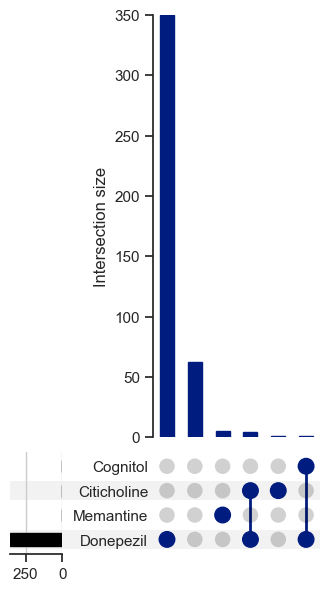

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df4 = pd.read_csv('raw_data.csv')

# List of symptom columns
#Donepezil	Memantine	Citicholine	Cognitol
Medications = ["Donepezil","Memantine","Cognitol","Citicholine",]

# Convert symptoms to boolean
df4[Medications] = df4[Medications] == 1

# Create UpSet plot data
upset_data = df4.set_index(Medications)
upset_data = upset_data.groupby(Medications).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

# Add title and show plot
plt.ylim(0,350)
fig = plt.gcf()
fig.set_size_inches(4, 7)
plt.grid(False)
plt.savefig('Figure_4B.svg', bbox_inches='tight', dpi=300)
plt.show()

In [198]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["Donepezil","Memantine","Cognitol","Citicholine"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,,62
1,Citicholine,1
2,Memantine,5
3,Donepezil,350
4,"Donepezil, Citicholine",4
5,"Donepezil, Cognitol",1


In [199]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Donepezil","Memantine","Cognitol","Citicholine",]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Donepezil,355
1,Memantine,5
2,Cognitol,1
3,Citicholine,5


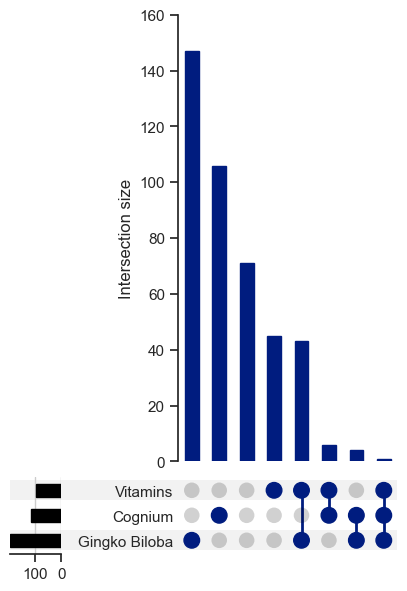

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df8 = pd.read_csv('raw_data.csv')

# List of symptom columns Gingko Biloba	Cognium	Vitamins
Medications = ["Cognium","Gingko Biloba","Vitamins"]

# Convert symptoms to boolean
df8[Medications] = df8[Medications] == 1

# Create UpSet plot data
upset_data = df8.set_index(Medications)
upset_data = upset_data.groupby(Medications).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()


plt.ylim(0,160)
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(5, 7)
plt.savefig('Figure_4C.svg', bbox_inches='tight', dpi=300)
plt.show()

In [286]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["Cognium","Gingko Biloba","Vitamins"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,,71
1,Vitamins,45
2,Gingko Biloba,147
3,"Gingko Biloba, Vitamins",43
4,Cognium,106
5,"Cognium, Vitamins",6
6,"Cognium, Gingko Biloba",4
7,"Cognium, Gingko Biloba, Vitamins",1


In [287]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Cognium","Gingko Biloba","Vitamins"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Cognium,117
1,Gingko Biloba,195
2,Vitamins,95


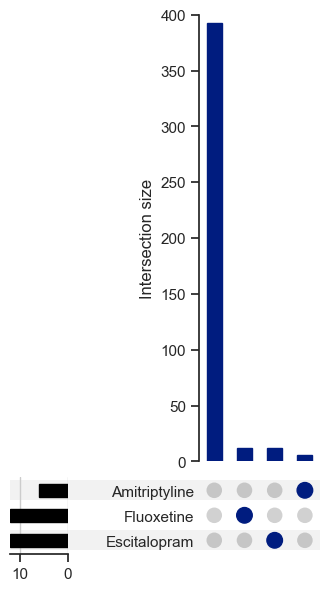

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df8 = pd.read_csv('raw_data.csv')

# List of symptom columns
#Amitriptyline	Escitalopram	Fluoxetine
Medications = ["Amitriptyline","Escitalopram","Fluoxetine"]

# Convert symptoms to boolean
df8[Medications] = df8[Medications] == 1

# Create UpSet plot data
upset_data = df8.set_index(Medications)
upset_data = upset_data.groupby(Medications).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

plt.ylim(0,400)
fig = plt.gcf()
fig.set_size_inches(4, 7)
plt.grid(False)
#Suppliments,Antidpressant
plt.savefig('Figure_4D.svg', bbox_inches='tight', dpi=300)
plt.show()

In [211]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Amitriptyline","Escitalopram","Fluoxetine"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Amitriptyline,6
1,Escitalopram,12
2,Fluoxetine,12


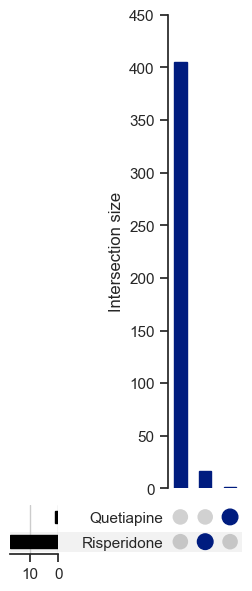

In [323]:
#Risperidone	Lisinopril 	Quetiapine
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df8 = pd.read_csv('raw_data.csv')

# List of symptom columns
#Amitriptyline	Escitalopram	Fluoxetine
Medications = ["Risperidone","Quetiapine"]

# Convert symptoms to boolean
df8[Medications] = df8[Medications] == 1

# Create UpSet plot data
upset_data = df8.set_index(Medications)
upset_data = upset_data.groupby(Medications).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

plt.ylim(0,450)
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(3, 7)
#Suppliments,AntidpressantAntipsyco
plt.savefig('Figure_4E.svg', bbox_inches='tight', dpi=300)
plt.show()

In [216]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Risperidone","Quetiapine"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Risperidone,17
1,Quetiapine,1


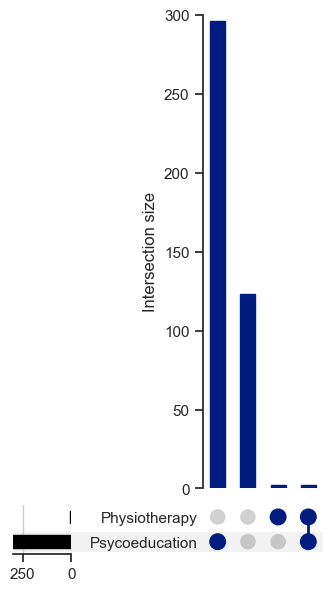

In [324]:
#Risperidone	Lisinopril 	Quetiapine
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df8 = pd.read_csv('raw_data.csv')

# List of symptom columns
#Amitriptyline	Escitalopram	FluoxetinePsycoeducation	Physiotherapy
Medications = ["Psycoeducation","Physiotherapy"]

# Convert symptoms to boolean
df8[Medications] = df8[Medications] == 1

# Create UpSet plot data
upset_data = df8.set_index(Medications)
upset_data = upset_data.groupby(Medications).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

plt.ylim(0,300)
fig = plt.gcf()
fig.set_size_inches(4, 7)
#Suppliments,AntidpressantAntipsycoANDT
plt.grid(False)
plt.savefig('Figure_4F.svg', bbox_inches='tight', dpi=300)
plt.show()

In [288]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
symptoms = ["Psycoeducation","Physiotherapy"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[symptoms] = df4[symptoms] == 1

# Create the UpSet plot data by grouping and counting unique combinations
upset_data = df4.set_index(symptoms).groupby(symptoms).size()

# Convert the results to a DataFrame with combinations and counts
combinations_df = upset_data.reset_index(name='Occurrences')

# Optionally, create a single column with the combination as a string
combinations_df['Combination'] = combinations_df[symptoms].apply(lambda x: ', '.join(x.index[x]), axis=1)

# Drop the individual investigation columns if you want only the Combination and Occurrences columns
combinations_df = combinations_df[['Combination', 'Occurrences']]

# Display the result
combinations_df

,Combination,Occurrences
0,,123
1,Physiotherapy,2
2,Psycoeducation,296
3,"Psycoeducation, Physiotherapy",2


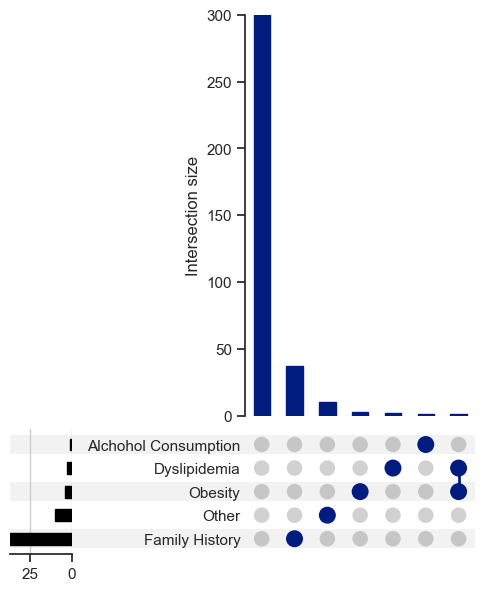

In [312]:

#Risperidone	Lisinopril 	Quetiapine
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
df8 = pd.read_csv('raw_data.csv')

# List of symptom columns
#Amitriptyline	Escitalopram	FluoxetinePsycoeducation	Physiotherapy
Medications = ["Family History", "Obesity", "Dyslipidemia", "Alchohol Consumption", "Other"]

# Convert symptoms to boolean
df8[Medications] = df8[Medications] == 1

# Create UpSet plot data
upset_data = df8.set_index(Medications)
upset_data = upset_data.groupby(Medications).size()

# Create UpSet plot with custom color and sorted by frequency
upset_plot = UpSet(upset_data, intersection_plot_elements=15, sort_by='cardinality')
upset_plot.style_subsets(min_subset_size=1, facecolor="b")
upset_plot.plot()

plt.ylim(0,300)
fig = plt.gcf()
fig.set_size_inches(6, 7)
plt.grid(False)
plt.savefig('Figure_2B.svg', bbox_inches='tight', dpi=300)
plt.show()

In [283]:
import pandas as pd

# Load the data
df4 = pd.read_csv('raw_data.csv')

# List of investigation columns
Symptoms = ["Family History", "Obesity", "Dyslipidemia", "Alchohol Consumption", "Other"]

# Convert investigations to boolean (True if "Yes", otherwise False)
df4[Symptoms] = df4[Symptoms] == 1

# Calculate the total occurrences for each investigation
Symptoms_totals = df4[Symptoms].sum().reset_index()

# Rename columns for clarity
investigation_totals.columns = ['Symptoms', 'Total Occurrences']

# Display the result
Symptoms_totals

,index,0
0,Family History,37
1,Obesity,4
2,Dyslipidemia,3
3,Alchohol Consumption,1
4,Other,10


In [234]:
from PIL import Image

# Load images
image1 = Image.open("Trend.png")
image2 = Image.open("Hist_.png")
image3 = Image.open("Loc_Borno.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height, image3.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))
image3 = image3.resize((int(image3.width * new_height / image3.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width + image3.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))
new_image.paste(image3, (image1.width + image2.width, 0))

# Save the concatenated image
new_image.save("Concatenated_Image1.png")

# Optionally, display the result
new_image.show()

In [249]:
from PIL import Image

# Load images
image1 = Image.open("Type.png")
image2 = Image.open("Social Class.png")
image3 = Image.open("Ethnicity.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height, image3.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))
image3 = image3.resize((int(image3.width * new_height / image3.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width + image3.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))
new_image.paste(image3, (image1.width + image2.width, 0))

# Save the concatenated image
new_image.save("Concatenated_Image2.png")

# Optionally, display the result
new_image.show()

In [254]:
from PIL import Image

# Load images
image1 = Image.open("Risk.png")
image2 = Image.open("Comobities.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))

# Save the concatenated image
new_image.save("Concatenated_Image_Risk_Comorbidities.png")

# Optionally, display the result
new_image.show()

In [261]:
from PIL import Image

# Load images
image1 = Image.open("Symptoms1.png")
image2 = Image.open("Investigation.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))

# Save the concatenated image
new_image.save("Symptom_Inves.png")

# Optionally, display the result
new_image.show()

In [260]:
from PIL import Image

# Load images
image1 = Image.open("Drugs.png")
image2 = Image.open("Drug1cog.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))

# Save the concatenated image
new_image.save("Med1.png")

# Optionally, display the result
new_image.show()

In [262]:
#Symptoms12,Behavioural_Neurological_
from PIL import Image

# Load images
image1 = Image.open("Symptoms12.png")
image2 = Image.open("Behavioural_.png")
image3 = Image.open("Neurological_.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height, image3.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))
image3 = image3.resize((int(image3.width * new_height / image3.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width + image3.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))
new_image.paste(image3, (image1.width + image2.width, 0))

# Save the concatenated image
new_image.save("3symptoms cat.png")

# Optionally, display the result
new_image.show()

In [263]:
from PIL import Image

# Load images
image1 = Image.open("Suppliments.png")
image2 = Image.open("Antidpressant.png")
image3 = Image.open("Antipsyco.png")
image4 = Image.open("ANDT.png")

# Resize images to have the same height
new_height = min(image1.height, image2.height, image3.height, image4.height)

image1 = image1.resize((int(image1.width * new_height / image1.height), new_height))
image2 = image2.resize((int(image2.width * new_height / image2.height), new_height))
image3 = image3.resize((int(image3.width * new_height / image3.height), new_height))
image4 = image4.resize((int(image4.width * new_height / image4.height), new_height))

# Concatenate images horizontally
total_width = image1.width + image2.width + image3.width + image4.width
new_image = Image.new('RGB', (total_width, new_height))

new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))
new_image.paste(image3, (image1.width + image2.width, 0))
new_image.paste(image4, (image1.width + image2.width + image3.width, 0))

# Save the concatenated image
new_image.save("Concatenated_Image_Supplements_Antidepressant_Antipsyco_ANDT.png")

# Optionally, display the result
new_image.show()


In [292]:
from PIL import Image

# Open the images
img1 = Image.open('Fig1.png')
img2 = Image.open('Fig1_2.png')

# Resize images if necessary (e.g., resize to the same width)
desired_width = min(img1.width, img2.width)  # Adjust this if needed
desired_height = max(img1.height, img2.height)

# Resize images to have the same width and desired height
img1 = img1.resize((desired_width, int(img1.height * desired_width / img1.width)))
img2 = img2.resize((desired_width, int(img2.height * desired_width / img2.width)))

# Concatenate images vertically
combined_vert = Image.new('RGB', (desired_width, img1.height + img2.height))
combined_vert.paste(img1, (0, 0))
combined_vert.paste(img2, (0, img1.height))

# Save the vertically combined image
combined_vert.save('Figure 1.png')



In [293]:
from PIL import Image

# Open the images
img1 = Image.open('Fig3_1.png')
img2 = Image.open('Fig3_2.png')

# Resize images if necessary (e.g., resize to the same width)
desired_width = min(img1.width, img2.width)  # Adjust this if needed
desired_height = max(img1.height, img2.height)

# Resize images to have the same width and desired height
img1 = img1.resize((desired_width, int(img1.height * desired_width / img1.width)))
img2 = img2.resize((desired_width, int(img2.height * desired_width / img2.width)))

# Concatenate images vertically
combined_vert = Image.new('RGB', (desired_width, img1.height + img2.height))
combined_vert.paste(img1, (0, 0))
combined_vert.paste(img2, (0, img1.height))

# Save the vertically combined image
combined_vert.save('Figure3.png')


In [294]:
from PIL import Image

# Open the images
img1 = Image.open('Fig4_1.png')
img2 = Image.open('Fig4_2.png')

# Resize images if necessary (e.g., resize to the same width)
desired_width = min(img1.width, img2.width)  # Adjust this if needed
desired_height = max(img1.height, img2.height)

# Resize images to have the same width and desired height
img1 = img1.resize((desired_width, int(img1.height * desired_width / img1.width)))
img2 = img2.resize((desired_width, int(img2.height * desired_width / img2.width)))

# Concatenate images vertically
combined_vert = Image.new('RGB', (desired_width, img1.height + img2.height))
combined_vert.paste(img1, (0, 0))
combined_vert.paste(img2, (0, img1.height))

# Save the vertically combined image
combined_vert.save('Figure4.png')


In [295]:
from PIL import Image

# Open the images
img1 = Image.open('Untitled.png')
img2 = Image.open('Untitled2.png')

# Resize images if necessary (e.g., resize to the same width)
desired_width = min(img1.width, img2.width)  # Adjust this if needed
desired_height = max(img1.height, img2.height)

# Resize images to have the same width and desired height
img1 = img1.resize((desired_width, int(img1.height * desired_width / img1.width)))
img2 = img2.resize((desired_width, int(img2.height * desired_width / img2.width)))

# Concatenate images vertically
combined_vert = Image.new('RGB', (desired_width, img1.height + img2.height))
combined_vert.paste(img1, (0, 0))
combined_vert.paste(img2, (0, img1.height))

# Save the vertically combined image
combined_vert.save('Figure1_.png')
